In [1]:
mpl.rcParams["font.family"] = "AppleGothic"

In [2]:
import konlpy
import pandas as pd
import mglearn

# Chapter.7 텍스트 데이터 다루기

## 7.1 문자열 데이터 타입

문자열 특성을 어떻게 다룰지 알기 위해서는 직접 봐야함

> 문자열 데이터 종류

- 범주형 데이터 : 고정된 목록으로 구성 ex) "빨강", "분홍", "초록"
- 범주에 의미를 연결시킬 수 있는 임의의 문자열 ex) "치과 오렌지색", "쥐색", "회색" -> 가장 보편적인 값을 선택
- 구조화된 문자열 데이터 : 미리 정의된 범주에 속하지 않지만 직접 입력한 값들이 주소, 장소, 이름처럼 일정한 구조를 가짐
- 텍스트 데이터 : 자유로운 형태의 절과 문정으로 구성

> 텍스트 분석에서는 데이터셋을 말뭉치(corpus)라 하고, 하나의 텍스트를 의미하는 각 데이터 포인트를 문서(document)라고 한다.

## 7.2 예제 애플리케이션: 영화 리뷰 감성 분석

이 데이터셋은 '양성', '음성'을 나타내는 레이블을 포함, 7점 이상은 '양성' 4점 이하는 '음성'인 이진 분류 데이터셋 ( 중간은 존재 X)

In [10]:
from sklearn.datasets import load_files

reviews_train = load_files("data/train/")
# 텍스트와 레이블을 포함하고 있는 Bunch 오브젝트를 반환합니다.
text_train, y_train = reviews_train.data, reviews_train.target
print("text_train의 타입: {}".format(type(text_train)))
print("text_train의 길이: {}".format(len(text_train)))
print("text_train[6]:\n{}".format(text_train[6]))

text_train의 타입: <class 'list'>
text_train의 길이: 25000
text_train[6]:
b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [11]:
# HTML 줄바꿈 태그 삭제
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [12]:
print("클래스별 샘플 수 (훈련 데이터): {}".format(np.bincount(y_train)))

클래스별 샘플 수 (훈련 데이터): [12500 12500]


In [13]:
reviews_test = load_files("data/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print("테스트 데이터의 문서 수: {}".format(len(text_test)))
print("클래스별 샘플 수 (테스트 데이터): {}".format(np.bincount(y_test)))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

테스트 데이터의 문서 수: 25000
클래스별 샘플 수 (테스트 데이터): [12500 12500]


> 문제 : 리뷰가 주어졌을 때, 텍스트 내용을 보고 양성인지 음성인지 구분하는 것(이진 분류), 문제를 해결하기 위해선 텍스트의 문자열 표현을 수치 표현으로 바꿔야 함

## 7.3 텍스트 데이터를 BOW로 표현하기

BOW(Bag of Words) : 장, 문단, 문장, 서식 같은 입력 텍스트의 구조 대부분을 잃고, 각 단어가 이 말뭉치에 있는 텍스트에 얼마나 많이 나타나는지 헤아림

> BOW 3단계
1. 토큰화 : 각 문서를 문서에 포함된 단어(토큰)로 나눈다. 예를 들어 공백이나 구두점 기준으로 분리
2. 어휘 사전 구축 : 모든 문서에 나타난 모든 단어의 어휘를 모아서 번호를 매김(알파벳 순서)
3. 인코딩 : 어휘 사전의 단어가 문서마다 몇 번이나 나타나는지 헤아림

### 7.3.1 샘플 데이터에 BOW 적용하기

In [23]:
bards_words =["The fool doth think he is wise,",
              "but the wise man knows himself to be a fool"]

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)  ##훈련 데이터를 토큰으로 나누고 어휘 사전을 구축하여 vocabulary_ 속성에 저장

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [31]:
print("어휘 사전의 크기: {}".format(len(vect.vocabulary_)))
print("어휘 사전의 내용:\n {}".format(vect.vocabulary_))

어휘 사전의 크기: 13
어휘 사전의 내용:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [32]:
bag_of_words = vect.transform(bards_words)
print("BOW: {}".format(repr(bag_of_words)))

BOW: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


BOW 표현은 0이 아닌 값만 저장하는 Scipy 희소 행렬로 저장되어 있음 (메모리 문제)

In [33]:
print("BOW의 밀집 표현:\n{}".format(bag_of_words.toarray()))

BOW의 밀집 표현:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


### 7.3.2 영화 리뷰에 대한 BOW

In [34]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))  ## 단어를 74849개 담고 있음

X_train:
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [35]:
feature_names = vect.get_feature_names()
print("특성 개수: {}".format(len(feature_names)))
print("처음 20개 특성:\n{}".format(feature_names[:20]))
print("20010에서 20030까지 특성:\n{}".format(feature_names[20010:20030]))
print("매 2000번째 특성:\n{}".format(feature_names[::2000]))

특성 개수: 74849
처음 20개 특성:
['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
20010에서 20030까지 특성:
['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']
매 2000번째 특성:
['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


희소 행렬의 고차원 데이터셋에서는 LogisticRegression 같은 선형 모델의 성능이 가장 뛰어남

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("교차 검증 평균 점수 : {:.2f}".format(np.mean(scores)))

교차 검증 평균 점수 : 0.88


In [25]:
# 그리도 서치를 사용하여 매개변수 C 찾기
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최적의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_)) ## C=0.1일때

최적의 크로스 밸리데이션 점수: 0.89


In [26]:
# 테스트 세트의 일반화 성능
X_test = vect.transform(text_test)
print("테스트 점수 : {:.2f}".format(grid.score(X_test, y_test)))

테스트 점수 : 0.88


In [27]:
## 정규표현식을 사용해 토큰을 추출
vect = CountVectorizer(min_df=5).fit(text_train) ## min_df : 토큰이 나타나는 최소 문서 개수
X_train = vect.transform(text_train)
print("min_df로 제한한 X_train: {}".format(repr(X_train)))

min_df로 제한한 X_train: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [28]:
feature_names = vect.get_feature_names()
print("처음 50개 특성:\n{}".format(feature_names[:50]))
print("20,010부터 20,030까지 특성:\n{}".format(feature_names[20010:20030]))
print("매 700번째 특성:\n{}".format(feature_names[::700]))

처음 50개 특성:
['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
20,010부터 20,030까지 특성:
['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
매 700번째 특성:
['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom', 'messiah', 'music', 'occasional', 'parking', 'pleasantville', 'pronunciation', 'recipient', 'r

숫자 길이가 줄고 희귀한 단어와 철자가 틀린 단어들이 사라짐

In [29]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최적의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))

최적의 크로스 밸리데이션 점수: 0.89


모델 성능은 높아지지 않았느나 특성의 개수가 줄어서 처리 속도가 빨라지고 불필요한 특성이 없어져 모델을 이해하기 쉬워짐

## 7.4 불용어

> 인터넷 검색 시 검색 용어로 사용하지 않는 단어. 관사, 전치사, 조사, 접속사 등 검색 색인 단어로 의미가 없는 단어

의미 없는 단어를 제거하는 방법 : 너무 빈번하여 유용하지 않은 단어를 제외

1. 언어별 불용어(stopword) 목록 사용
2. 너무 자주 나타나는 단어 제외

In [30]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("불용어 개수: {}".format(len(ENGLISH_STOP_WORDS)))
print("매 10번째 불용어:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

불용어 개수: 318
매 10번째 불용어:
['keep', 'even', 'ie', 'against', 'already', 'meanwhile', 'go', 'empty', 'it', 'often', 'see', 'less', 'whereupon', 'he', 'below', 'its', 'thin', 'hasnt', 'but', 'very', 'ten', 'nowhere', 'eight', 'been', 'top', 'hence', 'fill', 'himself', 'anything', 'elsewhere', 'though', 'whenever']


In [31]:
# stop_words="english"라고 지정하면 내장된 불용어를 사용합니다.
# 내장된 불용어에 추가할 수도 있고 자신만의 목록을 사용할 수도 있습니다.
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("불용어가 제거된 X_train:\n{}".format(repr(X_train)))
## 27271 - 26966 = 305개가 줄었다.

불용어가 제거된 X_train:
<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [32]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최상의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))

최상의 크로스 밸리데이션 점수: 0.88


성능이 약간 감소, 여기서는 불용어를 제외하는 것이 도움이 안됨. 고정된 불용어 목록은 모델이 데이터셋만 보고 불용어를 골라내기 어려운 작은 데이터셋에서 도움이 됨

## 7.5 tf-idf로 데이터 스케일 변경하기

> tf-idf(term frequency-inverse document frequency, 단어빈도-역문서빈도) : 말뭉치의 다른 문서보다 특정 문서에 자주 나타나는 단어에 높은 가중치를 주는 방법

$\text{tf-idf}(w, d) = \text{tf}(\log \dfrac{N + 1}{N_w + 1} + 1) $

$N$은 훈련 세트에 있는 문서의 개수, $ N_w $ 는 단어 w가 나타난 훈련 세트 문서의 개수 $tf$는 단어 w가 대상 문서 d에 나타난 횟수 

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("최상의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))

최상의 크로스 밸리데이션 점수: 0.89


In [40]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# 훈련 데이터셋을 변환합니다
X_train = vectorizer.transform(text_train)
# 특성별로 가장 큰 값을 찾습니다
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# 특성 이름을 구합니다
feature_names = np.array(vectorizer.get_feature_names())

print("가장 낮은 tfidf를 가진 특성:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))

print("가장 높은 tfidf를 가진 특성: \n{}".format(
      feature_names[sorted_by_tfidf[-20:]]))

## tf-idf가 낮은 특성은 전체 문서에 걸쳐 많이 나타나거나(1에 가까움), 조금씩만 사용되거나, 매우 긴문서에 사용됨(값이 작아짐)

가장 낮은 tfidf를 가진 특성:
['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
가장 높은 tfidf를 가진 특성: 
['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


In [41]:
## idf값이 낮은 단어 : 자주 나타나서 덜 중요하다고 생각되는 단어
sorted_by_idf = np.argsort(vectorizer.idf_)
print("가장 낮은 idf를 가진 특성:\n{}".format(
       feature_names[sorted_by_idf[:100]]))

가장 낮은 idf를 가진 특성:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


## 7.6 모델 계수 조사

In [42]:
grid.best_estimator_.named_steps["logisticregression"].coef_

array([[-0.44059613, -0.48399363, -0.11902619, ...,  0.29048459,
        -0.08807651, -0.36766813]])

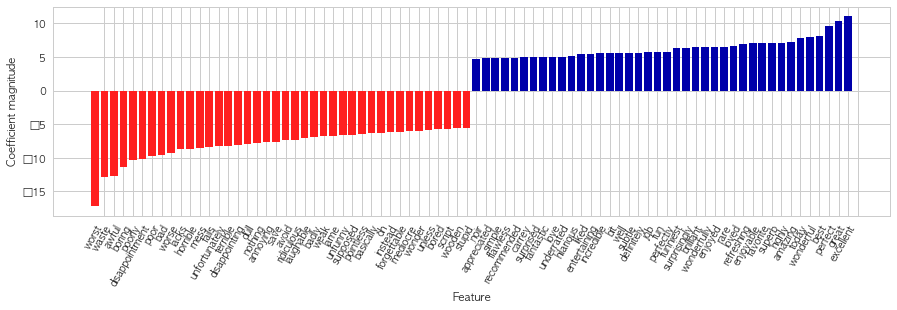

In [45]:
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_[0],
    feature_names, n_top_features=40)
## 로지스틱 회귀의 가장 큰 계수 25개와 가장 작은 계수 25개를 보여줌

왼쪽의 음수 계수는 모델에서 부정적인 리뷰를 의미하는 단어에 속하고, 오른쪽 양수 계수는 긍정적인 리뷰의 단어

## 7.7 여러 단어로 만든 BOW(n-그램)

> BOW 방식은 단어의 순서가 완전히 무시됨. 그래서 의미가 완전히 반대인 두 문자열이 동일하게 변환됨

> not은 문맥의 중요성을 보여주는 예

- 문맥을 고려하는 방법 : 토큰 하나의 횟수만 고려하지 않고 옆에 있는 두세 개의 토큰을 함께 고려하는 방식 ex)bigram, trigram, n-gram

In [24]:
print("bards_words:\n{}".format(bards_words))

bards_words:
['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [25]:
#토큰 한개 : unigram
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print("어휘 사전 크기: {}".format(len(cv.vocabulary_)))
print("어휘 사전:\n{}".format(cv.get_feature_names()))

어휘 사전 크기: 13
어휘 사전:
['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


In [26]:
#토큰 두개 : bigram
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print("어휘 사전 크기: {}".format(len(cv.vocabulary_)))
print("어휘 사전:\n{}".format(cv.get_feature_names()))

어휘 사전 크기: 14
어휘 사전:
['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


연속된 토큰의 수가 커지면 보통 특성이 더 구체적이고 많이 만들어짐

In [27]:
# bard_words에 유니그램, 바이그램, 트라이그램을 적용한 예
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print("어휘 사전 크기: {}".format(len(cv.vocabulary_)))
print("어휘 사전:{}\n".format(cv.get_feature_names()))

어휘 사전 크기: 39
어휘 사전:['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']



# 7.8 고급 토큰화, 어간 추출, 표제어 추출

- 어간 추출 : 일일이 어미를 찾아 제외하는 규칙 기반 방식
- 표제어(단어의 표준 형태) 추출 : 대신 알려진 단어의 형태 사전을 사용하고 문장에서 단어의 역할을 고려하는 처리 방식
- 표제어 추출과 어간 추출은 단어의 일반 형태를 추출하는 정규화의 일종

### 7.8.1 KoNLPy를 사용한 영화 리뷰 분석

In [38]:
import konlpy

In [39]:
df_train = pd.read_csv('data/ratings_train.txt', delimiter='\t', keep_default_na=False)

In [40]:
df_train.head()
## label : 0 부정 / lobel : 1 긍정

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [41]:
text_train, y_train = df_train['document'].as_matrix(), df_train['label'].as_matrix()

In [103]:
df_test = pd.read_csv('data/ratings_test.txt', delimiter='\t', keep_default_na=False)
text_test = df_test['document'].as_matrix()
y_test = df_test['label'].as_matrix()

In [104]:
len(text_train), np.bincount(y_train)

(150000, array([75173, 74827]))

In [105]:
len(text_test), np.bincount(y_test)

(50000, array([24827, 25173]))

In [106]:
# KoNLPy의 Twitter 클래스 객체 만들기
from konlpy.tag import Twitter
twitter_tag = Twitter()

In [108]:
def twitter_tokenizer(text):
    return twitter_tag.morphs(text)

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

twit_param_grid = {'tfidfvectorizer__min_df': [3, 5 ,7],
              'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
              'logisticregression__C': [0.1, 1, 10]}
twit_pipe = make_pipeline(TfidfVectorizer(tokenizer=twitter_tokenizer), LogisticRegression())
twit_grid = GridSearchCV(twit_pipe, twit_param_grid)

# 그리드 서치를 수행합니다
twit_grid.fit(text_train[0:1000], y_train[0:1000])  # 데이터 1000개만 적용
print("최상의 크로스 밸리데이션 점수: {:.3f}".format(twit_grid.best_score_))
print("최적의 크로스 밸리데이션 파라미터: ", twit_grid.best_params_)

최상의 크로스 밸리데이션 점수: 0.727
최적의 크로스 밸리데이션 파라미터:  {'logisticregression__C': 1, 'tfidfvectorizer__min_df': 3, 'tfidfvectorizer__ngram_range': (1, 1)}


In [110]:
X_test_twit = twit_grid.best_estimator_.named_steps["tfidfvectorizer"].transform(text_test)
score = twit_grid.best_estimator_.named_steps["logisticregression"].score(X_test_twit, y_test)
print("테스트 세트 점수: {:.3f}".format(score))

테스트 세트 점수: 0.721


## 7.9 토픽 모델링과 문서 군집화

> 토픽 모델링 : 문서를 하나 또는 그 이상의 토픽으로 할당하는 작업

### 7.9.1 LDA ( Latent Dirichlet Allocation ) 잠재 디리클레 할당

> 함께 자주 나타나는 단어의 그룹(토픽)을 찾는 것

> 머신러닝에서의 토픽은 PCA나 NMF로 추출한 성분에 가깝다(의미가 없을 수도 있음)